In [11]:
# Data science with python

# Application of data science

# Step 1
# Import necessary libraries
# %pip install scikit-learn
%pip install scipy

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt



Note: you may need to restart the kernel to use updated packages.


In [12]:
df = pd.read_csv("crop.csv")

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
# Check duplicates

print(df.duplicated().sum())

0


In [14]:
# 

df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
# Check null values

print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


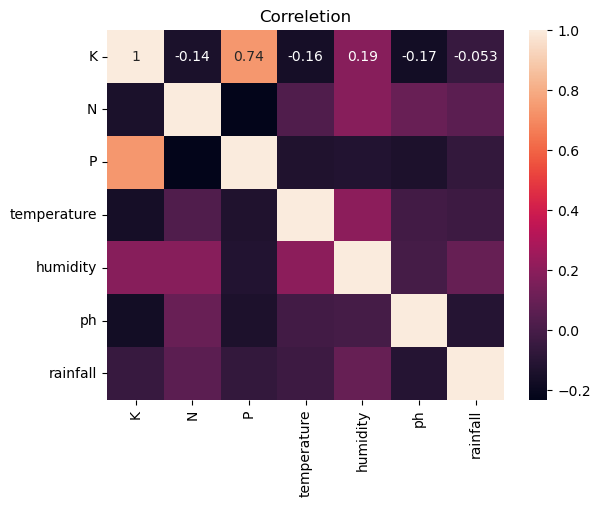

In [16]:
c = df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target'] = c.cat.codes

y = df.target
x = df[['K','N','P','temperature', 'humidity','ph', 'rainfall']]

sns.heatmap(x.corr(), annot=True)
plt.title("Correletion")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [18]:
# Selection of model: KNN, Confusion Matrix, Random forst, Use classification like SVM, decision tree
# Predict using knn

from sklearn.neighbors import KNeighborsClassifier 


knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
score = knn.score(X_test_scaled, y_test)
print(score)


0.975


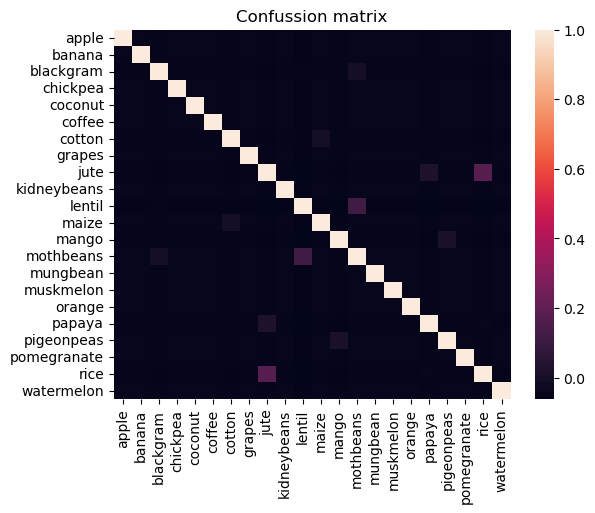

In [19]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, knn.predict(X_test_scaled))

df_cm = pd.DataFrame(mat,index=(i for i in targets.values()), columns=(targets.values()))
sns.heatmap(df_cm.corr())
plt.title("Confussion matrix")
plt.show()


In [20]:
# Classification using Support Vector Classifier

from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train_scaled, y_train)
score = svc_linear.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='rbf')
svc_poly.fit(x_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

0.9704545454545455
0.9886363636363636
0.9840909090909091


In [21]:
#  Highlights
# Poly kernel has a small margin accuracy score than the RBF 

In [22]:
# Classifier using decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

0.9954545454545455

In [23]:
# Classifier using decision random forest 

from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

0.9977272727272727

In [24]:
# Machine learning
# Split data into three categories
# Numerical , Categorical and Ordinal


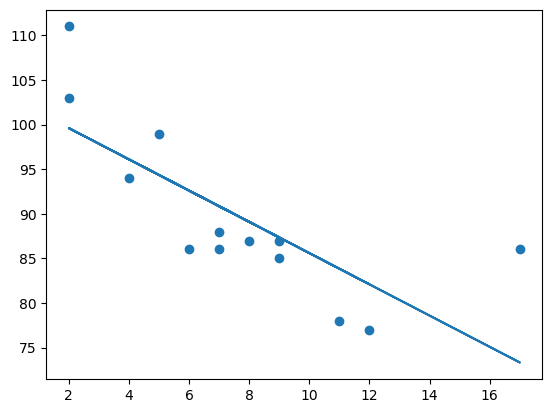

In [25]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

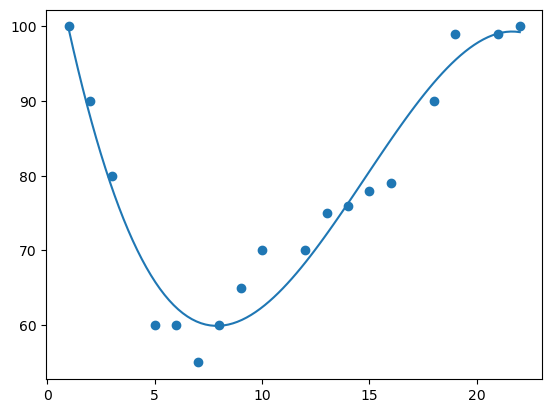

In [26]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()